# **Machine Learning Implementation**

Latar Belakang Tugas

Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Sekarang, kami meminta anda untuk membuka potensi maksimal dari data kami. Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman datap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses. Evaluasi akan dilakukan dengan mengecek seberapa dalam pemahaman analisa yang anda kerjakan. Sebagai catatan, anda perlu menggunakan setidaknya 2 model Machine Learning dimana salah satunya adalah Logistic Regression. Setelah itu, buatlah slide presentasi yang mengandung analisa hasil pemodelan secara end-to-end beserta rekomendasi bisnisnya (maksimal 10 halaman)

Tahapan Pengerjaan
1. Download Dataset yang dibutuhkan.
2. Pelajari konteks masalah dari sumber eksternal untuk meningkatkan Subject Matter Knowledge.
3. Pahami deskripsi kolom yang tersedia.
4. Tentukan goal, objective, dan metrics dari masalah yang ada.
5. Lakukan penggalian informasi terkait kondisi data awal.
6. Lakukan proses Data Cleaning dan Data Processing.
7. Lakukan proses penggalian insight mengacu kepada objective yang sudah ditetapkan.
8. Lakukan pemodelan dengan berbagai macam metode (termasuk Logistic Regression) dan hyperparameternya.
9. Evaluasi hasil pemodelan.
10. Ukur seberapa besar dampak pemodelan dan rekomendasi bisnis terhadap metrics yang telah ditetapkan sebelumnya.
11. Push file .ipynb mu ke dalam github.
12. Buat file presentasi untuk menjelaskan pekerjaan yang telah dilakukan dan cantumkan link repo github di dalam ppt nya

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_TRAIN = pd.read_csv('./FINAL_PROJECT/application_train.csv')
df_TRAIN

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_TEST = pd.read_csv('./FINAL_PROJECT/application_test.csv')
df_TEST

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


## 1. Data Preprocecing
Berikut adalah tahapan data preprocessing yang dilakukan:
1. Cek data duplikat
2. Pemilihan variabel pemodelan
3. Cek dan penanganan missing value
4. Cek word spelling
4. Penambahan variabel untuk pemodelan

Pada tahap ini tidak dilakukan identifying outlier karena dirasa kurang penting terhadap pemodelan yang akan dilakukan. Identifikasi outlier begitu penting ketika diimplementasikan untuk analisis model parametrik atau uji parametrik yang membutuhkan asumsi data tanpa outlier ataupun normalitas data. Namun, pada classification (klasifikasi) tidak terdapat asumsi tersebut sehingga identifying outlier bisa diabaikan.

# data Duplikat

In [4]:
df_TRAIN.duplicated().sum()

0

In [5]:
df_TEST.duplicated().sum()

0

Sebelum checking missing value, terlebih dahulu akan dipilih beberapa variabel yang akan digunakan untuk pemodelan. 

In [6]:
# nama variabel
df_TRAIN.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [7]:
train=df_TRAIN[['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH']]

test=df_TEST[['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH']]

In [8]:
print('Cek Missing Value Data Training:\n',train.isna().sum(),"\n\n","Cek Missing Value Data Testing:\n",test.isna().sum())


Cek Missing Value Data Training:
 TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
dtype: int64 

 Cek Missing Value Data Testing:
 NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    24
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE 

In [9]:
train=train.dropna()
test=test.dropna()

In [10]:
#rechecking missing value data train dan test
print('Cek Missing Value Data Training:\n',train.isna().sum(),"\n\n","Cek Missing Value Data Testing:\n",test.isna().sum())

Cek Missing Value Data Training:
 TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
dtype: int64 

 Cek Missing Value Data Testing:
 NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE  

In [11]:
#melihat jumlah rows data yang telah bersih
print(len(train),len(test))

306207 47809


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306207 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      306207 non-null  int64  
 1   NAME_CONTRACT_TYPE          306207 non-null  object 
 2   CODE_GENDER                 306207 non-null  object 
 3   FLAG_OWN_CAR                306207 non-null  object 
 4   FLAG_OWN_REALTY             306207 non-null  object 
 5   CNT_CHILDREN                306207 non-null  int64  
 6   AMT_INCOME_TOTAL            306207 non-null  float64
 7   AMT_CREDIT                  306207 non-null  float64
 8   AMT_ANNUITY                 306207 non-null  float64
 9   AMT_GOODS_PRICE             306207 non-null  float64
 10  NAME_TYPE_SUITE             306207 non-null  object 
 11  NAME_INCOME_TYPE            306207 non-null  object 
 12  NAME_EDUCATION_TYPE         306207 non-null  object 
 13  NAME_FAMILY_ST

In [13]:
print(train['TARGET'].unique(),'\n',
      train['NAME_CONTRACT_TYPE'].unique(),'\n',
      train['CODE_GENDER'].unique(),'\n',
      train['FLAG_OWN_CAR'].unique(),'\n',
      train['FLAG_OWN_REALTY'].unique(),'\n',
      train['NAME_TYPE_SUITE'].unique(),'\n',
      train['NAME_INCOME_TYPE'].unique(),'\n',
      train['NAME_EDUCATION_TYPE'].unique(),'\n',
      train['NAME_FAMILY_STATUS'].unique(),'\n',
      train['NAME_HOUSING_TYPE'].unique())

[1 0] 
 ['Cash loans' 'Revolving loans'] 
 ['M' 'F' 'XNA'] 
 ['N' 'Y'] 
 ['Y' 'N'] 
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people'] 
 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 
 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 
 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'] 
 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


In [14]:
print(train['NAME_CONTRACT_TYPE'].unique(),'\n',
      train['CODE_GENDER'].unique(),'\n',
      train['FLAG_OWN_CAR'].unique(),'\n',
      train['FLAG_OWN_REALTY'].unique(),'\n',
      train['NAME_TYPE_SUITE'].unique(),'\n',
      train['NAME_INCOME_TYPE'].unique(),'\n',
      train['NAME_EDUCATION_TYPE'].unique(),'\n',
      train['NAME_FAMILY_STATUS'].unique(),'\n',
      train['NAME_HOUSING_TYPE'].unique())

['Cash loans' 'Revolving loans'] 
 ['M' 'F' 'XNA'] 
 ['N' 'Y'] 
 ['Y' 'N'] 
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people'] 
 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 
 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 
 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'] 
 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


In [15]:
train.drop(train.index[train['CODE_GENDER']=='XNA'],inplace=True)
train.drop(train.index[train['NAME_INCOME_TYPE']=='Maternity leave'],inplace=True)

In [16]:
#rechecking kategori CODE_GENDER
train.CODE_GENDER.unique()

array(['M', 'F'], dtype=object)

In [17]:
#rechecking kategori NAME_INCOME_TYPE
train.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman'], dtype=object)

In [18]:
print(len(train))
print(len(test))

306198
47809


Variabel DAYS_BIRTH kurang bisa memberikan makna untuk pemodelan sehingga akan diganti dengan variabel AGE yang berisi umur pelanggan (tahun dalam integer). 

In [19]:
AGE_TR=(train['DAYS_BIRTH']/-365).astype(int)
AGE_TS=(test['DAYS_BIRTH']/-365).astype(int)

In [20]:
train=train.assign(AGE=AGE_TR).drop('DAYS_BIRTH',axis=1)
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54


In [21]:
test=test.assign(AGE=AGE_TS).drop('DAYS_BIRTH',axis=1)
test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,52
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,49
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,38
4,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,35
5,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.025164,50


In [22]:
train.isnull()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
307507,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
307508,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
307509,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
#Total Number of Missing NA
train.isnull().sum().sum()

0

## 2. EDA 

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import order
import numpy as np

<Axes: ylabel='TARGET'>

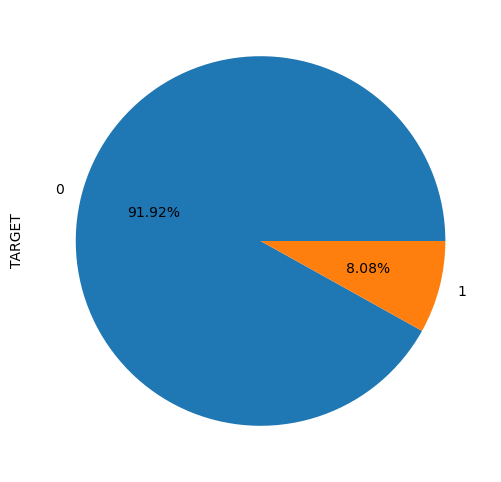

In [25]:
plt.figure(figsize=(6,6))
train.TARGET.value_counts().plot(kind='pie',autopct='%.2f%%')

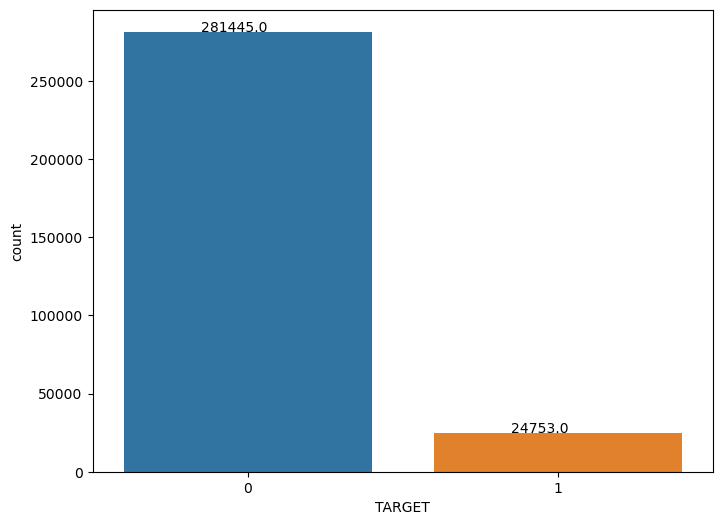

In [26]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='TARGET', data=train, order=train['TARGET'].value_counts(ascending=False).index)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

Berdasarkan visualisasi di atas, dapat dilihat bahwa jumlah TARGET dengan kategori 0 lebih banyak (281445) dibanding kategori 0 (24753) dengan persentase masing-masing adalah 91.92% dan 8.08%. Hal tersebut mengartikan bahwa pelanggan yang tidak memiliki kesulitan pembayaran jumlahnya lebih banyak (TARGET == 0).

<Axes: xlabel='TARGET', ylabel='count'>

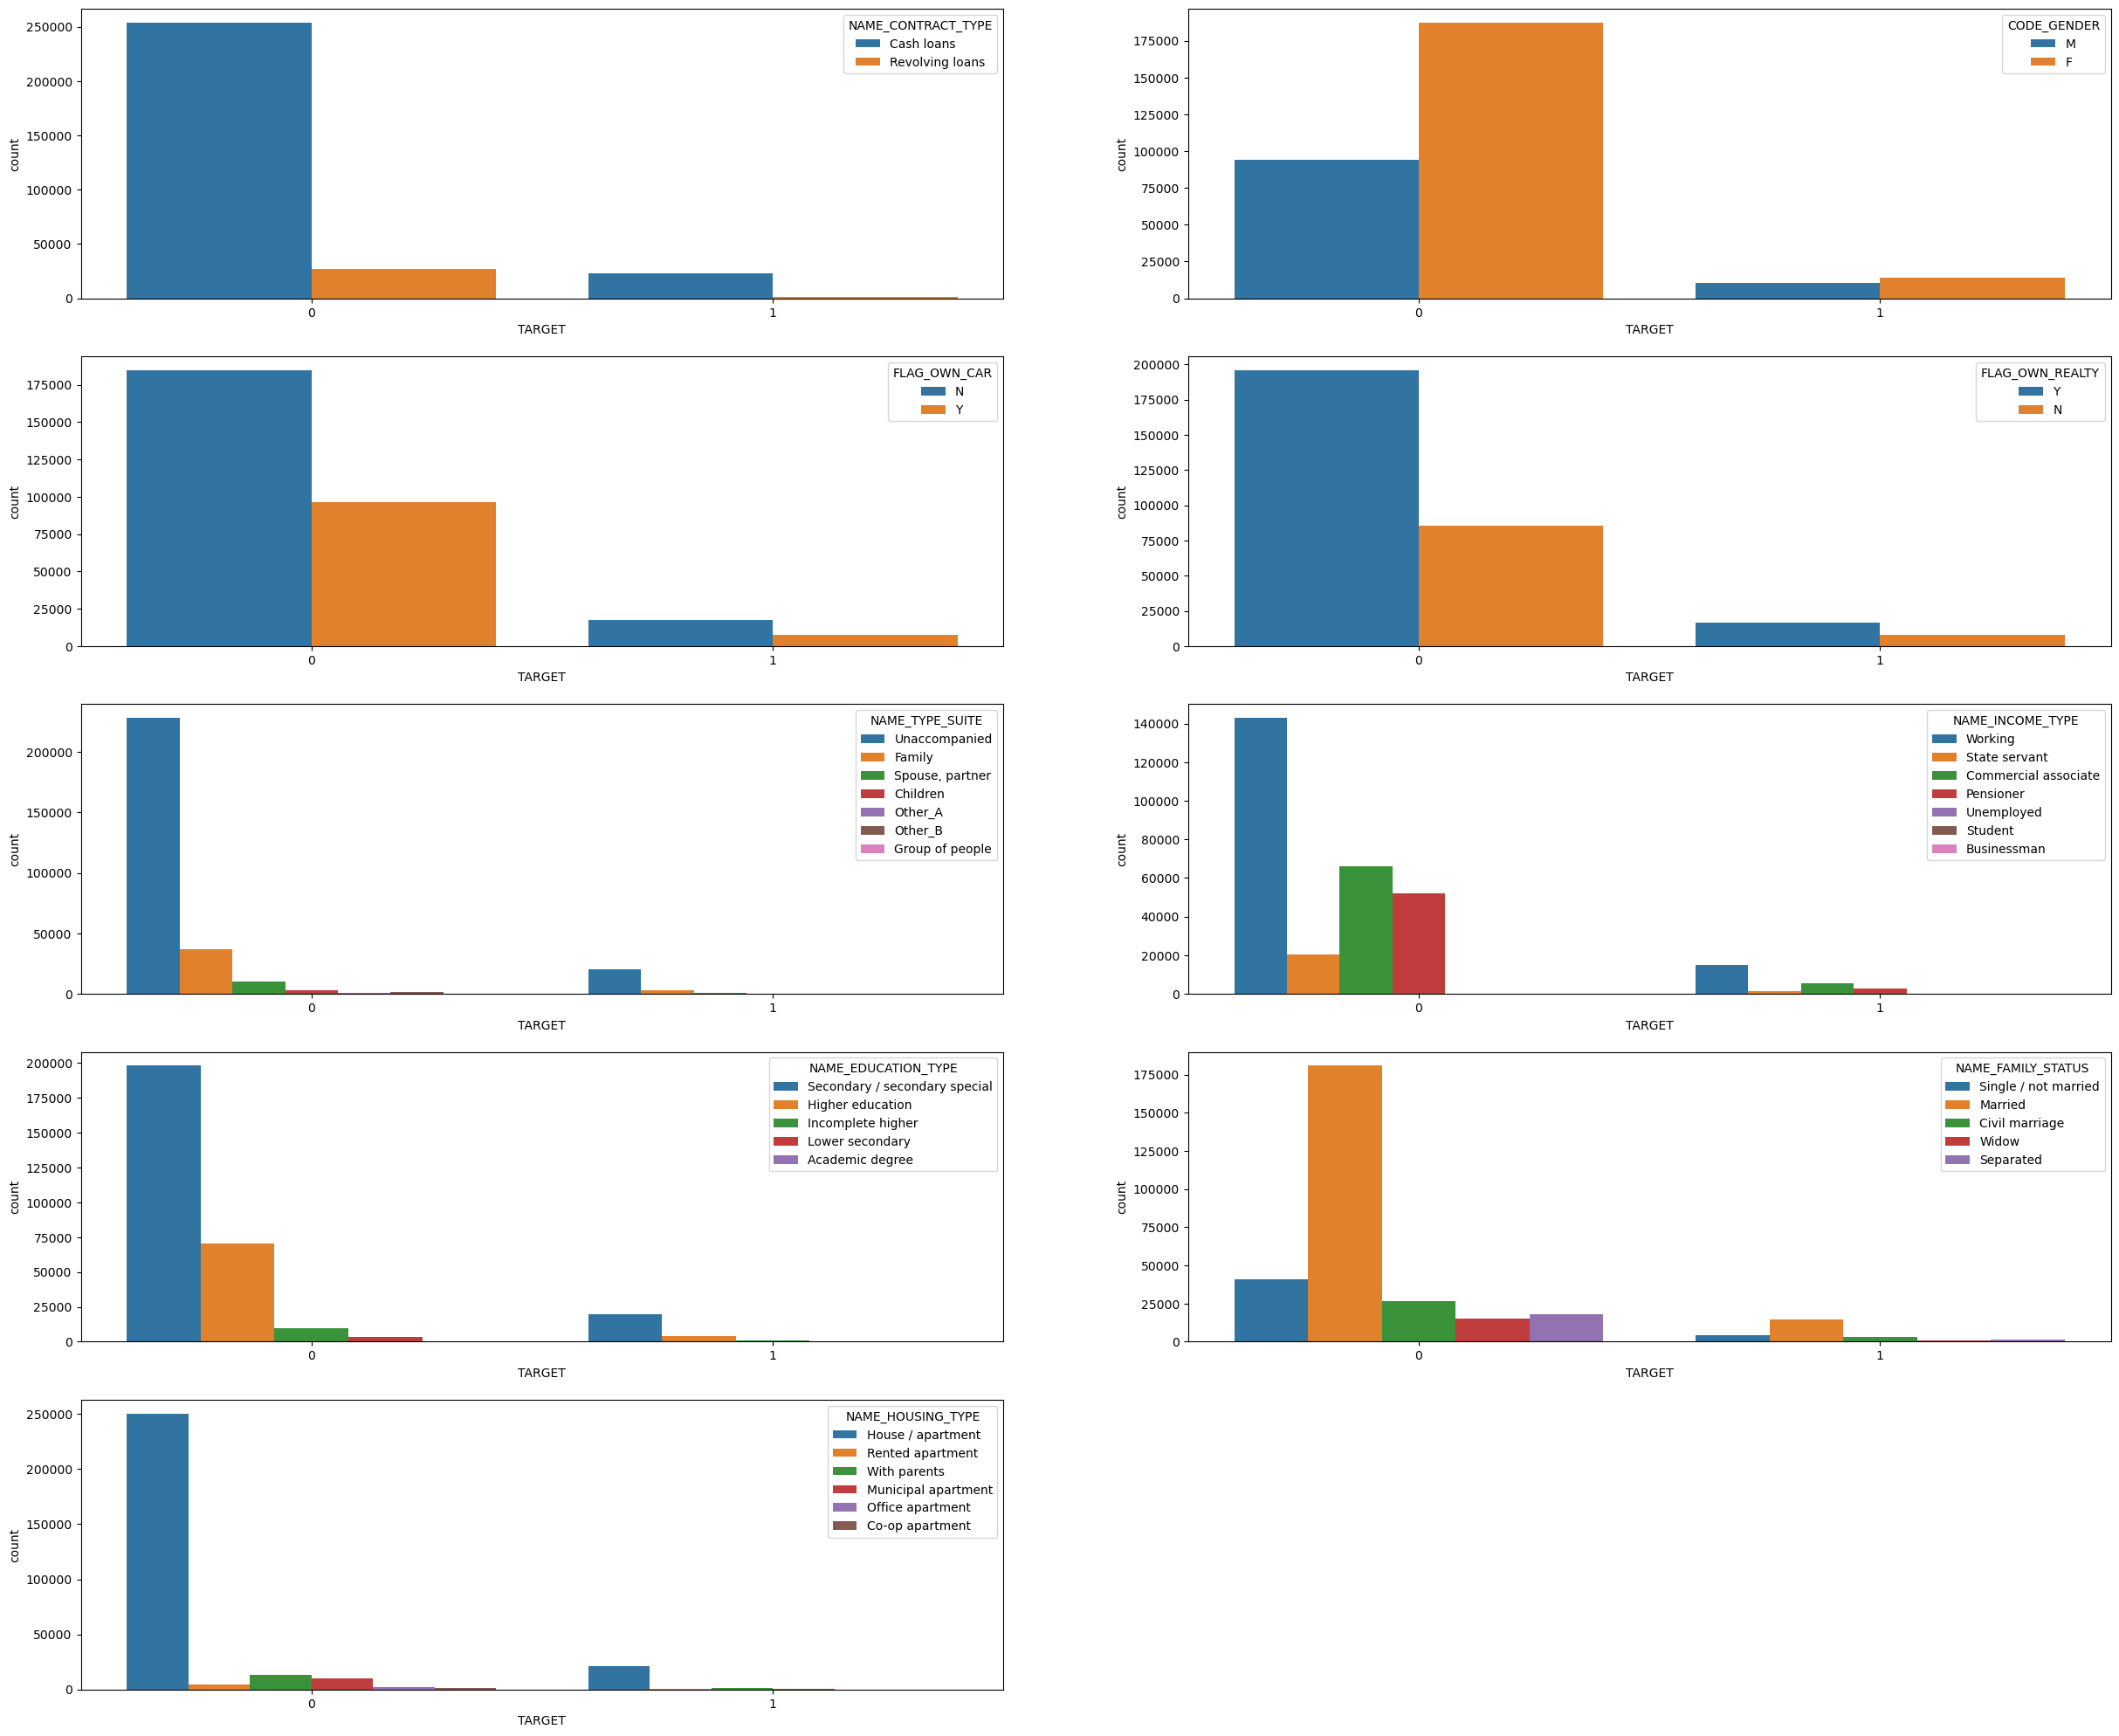

In [27]:
#Countplot TARGET Berdasarkan beberapa kategori
plt.figure(figsize=(30,25))

plt.subplot(5,2,1)
sns.countplot(x=train.TARGET,hue=train.NAME_CONTRACT_TYPE)

plt.subplot(5,2,2)
sns.countplot(x=train.TARGET,hue=train.CODE_GENDER)

plt.subplot(5,2,3)
sns.countplot(x=train.TARGET,hue=train.FLAG_OWN_CAR)

plt.subplot(5,2,4)
sns.countplot(x=train.TARGET,hue=train.FLAG_OWN_REALTY)

plt.subplot(5,2,5)
sns.countplot(x=train.TARGET,hue=train.NAME_TYPE_SUITE)

plt.subplot(5,2,6)
sns.countplot(x=train.TARGET,hue=train.NAME_INCOME_TYPE)

plt.subplot(5,2,7)
sns.countplot(x=train.TARGET,hue=train.NAME_EDUCATION_TYPE)

plt.subplot(5,2,8)
sns.countplot(x=train.TARGET,hue=train.NAME_FAMILY_STATUS)

plt.subplot(5,2,9)
sns.countplot(x=train.TARGET,hue=train.NAME_HOUSING_TYPE)

C:\Users\asus\AppData\Local\Temp\ipykernel_20140\126992638.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap='Greens',annot=True)


<Axes: >

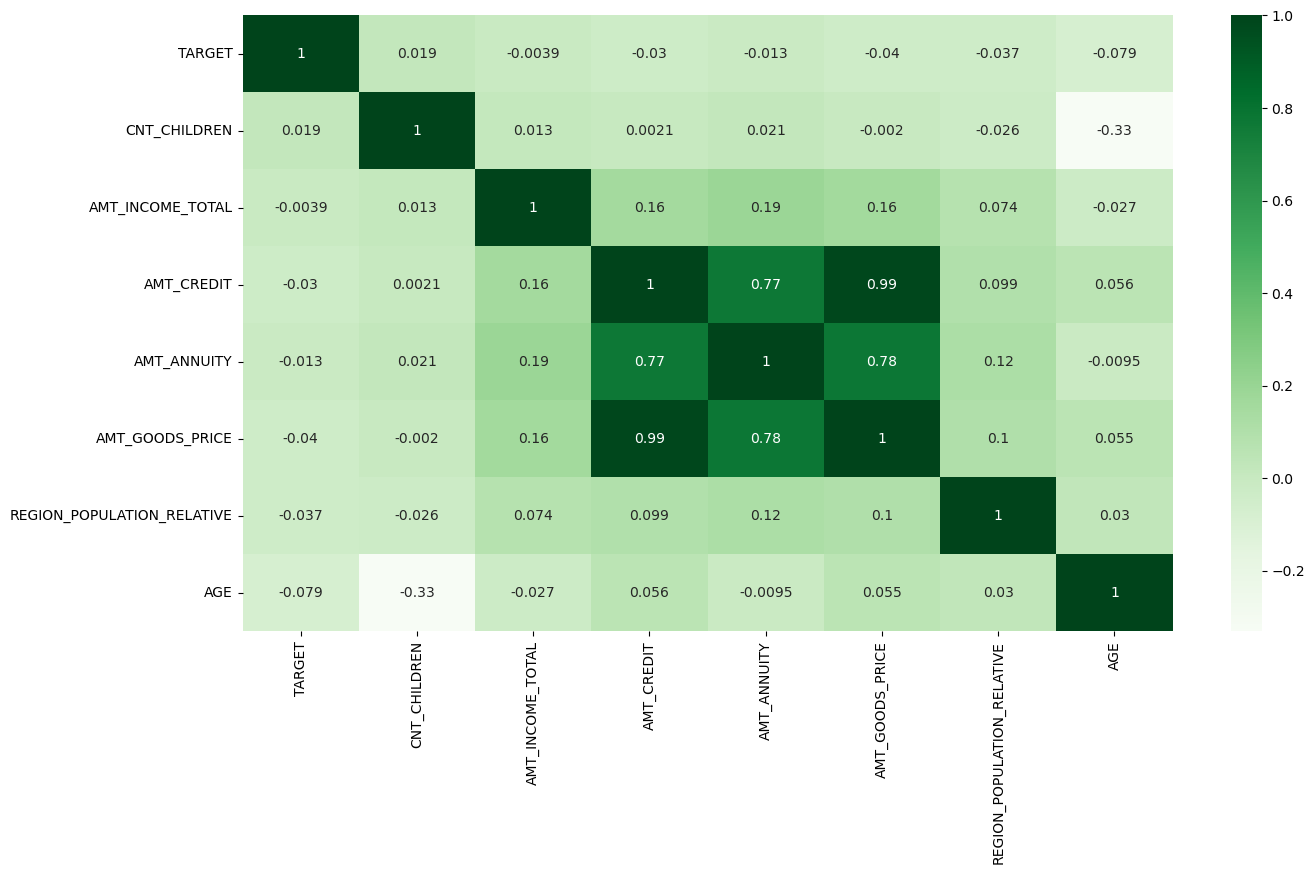

In [28]:
#membentuk heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),cmap='Greens',annot=True)

Matrix korelasi di atas menunjukkan bahwa variabel CNT_CHILDREN, ANT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE, dan AGE memiliki nilai korelasi yang rendah terhadap variabel TARGET. Hal ini bisa dilihat pada nilai absolute koefisien korelasi < 0.8.

## 3. Classification 

In [29]:
X=train.drop('TARGET',axis=1)
y=train['TARGET']

In [30]:
X=pd.get_dummies(X)
X

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,1,0,1,...,1,0,0,0,0,1,0,0,0,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,25,1,0,0,...,0,1,0,0,0,0,0,0,0,1
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,56,1,0,1,...,0,0,0,1,0,1,0,0,0,0
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,41,1,0,1,...,0,1,0,0,0,1,0,0,0,0
307509,0,171000.0,370107.0,20205.0,319500.0,0.005313,32,1,0,1,...,1,0,0,0,0,1,0,0,0,0


In [31]:
X_test_cek=pd.get_dummies(test)
X_test_cek

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,135000.0,568800.0,20560.5,450000.0,0.018850,52,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,99000.0,222768.0,17370.0,180000.0,0.035792,49,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,38,1,0,1,...,1,0,0,0,0,1,0,0,0,0
4,1,180000.0,625500.0,32067.0,625500.0,0.010032,35,1,0,0,...,1,0,0,0,0,1,0,0,0,0
5,0,270000.0,959688.0,34600.5,810000.0,0.025164,50,1,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,121500.0,412560.0,17473.5,270000.0,0.002042,54,1,0,1,...,0,0,0,1,0,1,0,0,0,0
48740,2,157500.0,622413.0,31909.5,495000.0,0.035792,30,1,0,1,...,1,0,0,0,0,1,0,0,0,0
48741,1,202500.0,315000.0,33205.5,315000.0,0.026392,43,1,0,1,...,1,0,0,0,0,1,0,0,0,0
48742,0,225000.0,450000.0,25128.0,450000.0,0.018850,38,1,0,0,...,1,0,0,0,0,1,0,0,0,0


Pada kali ini, akan dilakukan pembagian data 75% untuk training dan 25% untuk testing.


In [32]:
#split data train menjadi training dan testing (untuk melihat overfitting model klasifikasi)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=60)

Pada tahap classifiction ini, digunakan dua macam metode yaitu:
1. Regresi logistik
2. K-Nearest Neighbor

Untuk hyperparameter tuning yang akan digunakan adalah Random Search CV.

**Random Search**

Random search mirip dengan grid search, tetapi alih-alih menggunakan semua titik di kisi, ini hanya menguji subset yang dipilih secara acak dari titik-titik ini. Semakin kecil subset ini, semakin cepat tetapi kurang akurat pengoptimalan. Semakin besar kumpulan data ini, semakin akurat pengoptimalan tetapi semakin mendekati grid seaarch.

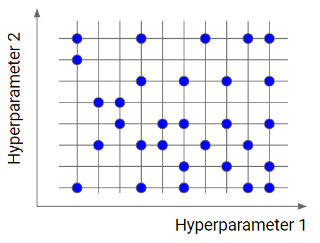

Random serach adalah pilihan yang sangat berguna ketika memiliki beberapa hyperparameters dengan grid nilai yang halus. Menggunakan subset yang dibuat oleh 5-100 titik yang dipilih secara acak, kita bisa mendapatkan set nilai hyperparameter yang cukup baik. Ini mungkin tidak akan menjadi poin terbaik, tetapi masih bisa menjadi kumpulan nilai yang baik yang memberi kita model yang baik.

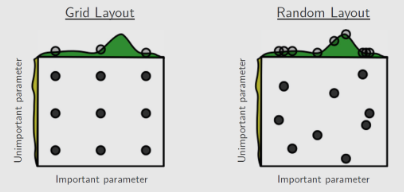

Strategi Grid search secara terang-terangan melewatkan model yang optimal dan menghabiskan waktu yang berlebihan untuk menjelajahi parameter yang tidak penting. Grid serach mengisolasi setiap hyperparameter dan mencari nilai terbaik yang mungkin sambil mempertahankan semua hyperparameter lainnya konstan. Untuk kasus di mana hyperparameter yang sedang dipelajari memiliki pengaruh yang kecil pada skor model yang dihasilkan, hal ini menghasilkan usaha yang sia-sia. Sebaliknya, Random serach memiliki kekuatan eksplorasi yang jauh lebih baik dan dapat berfokus pada menemukan nilai optimal untuk hyperparameter penting.

In [77]:
#classification
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import mlxtend
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
import matplotlib.pyplot as plt

In [34]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [35]:
#logistic regression 
logModel = LogisticRegression()
parameter = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = RandomizedSearchCV(logModel, param_distributions = parameter, n_iter=100, cv = 5, verbose = 2, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.9188845538563705
Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 2000, 'C': 0.0001}


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70425
           1       0.00      0.00      0.00      6125

    accuracy                           0.92     76550
   macro avg       0.46      0.50      0.48     76550
weighted avg       0.85      0.92      0.88     76550



C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


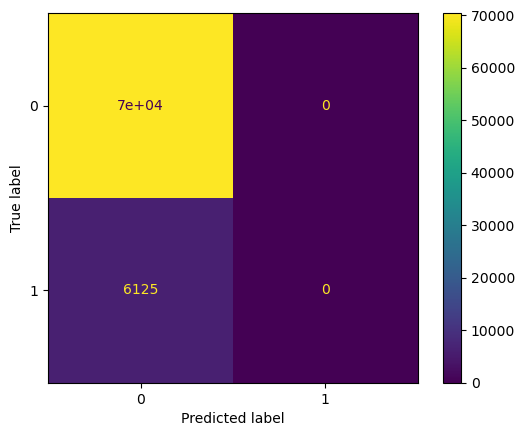

In [78]:
#Evaluasi model regresi logistik 

logModel=LogisticRegression(solver= 'liblinear', penalty= 'l1', max_iter= 2000, C= 0.0001).fit(X_train,y_train)
y_prediksi_log=logModel.predict(X_test)

print(classification_report(y_test,y_prediksi_log))
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_prediksi_log)
display = ConfusionMatrixDisplay(confusion_matrix)
display.plot()

In [42]:
print('Accuracy:',accuracy_score(y_test,y_prediksi_log))
print('Precision:',precision_score(y_test,y_prediksi_log,average='macro'))
print('Recall:',recall_score(y_test,y_prediksi_log,average='macro'))
print('f1-score:',f1_score(y_test,y_prediksi_log,average='macro'))

Accuracy: 0.9199869366427171
Precision: 0.45999346832135857
Recall: 0.5
f1-score: 0.47916312298009867


C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Berdasarkan hasil klasifikasi dengan metode KNN di atas, dapat dilihat bahwa nilai akurasi data testing 0.9187067276290006 atau 91.87% sangat tinggi. Nilai tersebut hampir sama dengan best score data training yang sebesar 0.9174824104094215 atau 91.75% sehingga metode KNN tersebut layak digunakan.

In [44]:
#KNN
knn = KNeighborsClassifier()
parameter = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance']}
clf_knn = RandomizedSearchCV(knn, param_distributions = parameter, n_iter=100, cv = 5, verbose = 2,  n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
KNN
Best Score: 0.9174867649566574
Best Parameters: {'weights': 'uniform', 'n_neighbors': 9}


Output Random Search dengan 5-fold Cross-Validation di atas menunjukkan bahwa parameter terbaik dengan metode KNN adalah:

- weights = 'uniform' 

- n_neighbors = 9

Sehingga akan dilakukan pemodelan menggunakan parameter di atas (best parameters).

C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70425
           1       0.00      0.00      0.00      6125

    accuracy                           0.92     76550
   macro avg       0.46      0.50      0.48     76550
weighted avg       0.85      0.92      0.88     76550



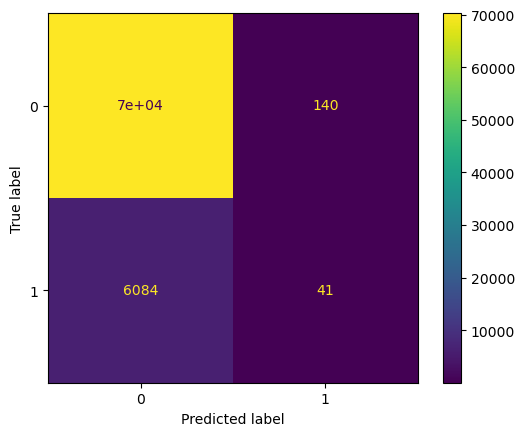

In [89]:
#Evaluasi model KNN 

knn=KNeighborsClassifier(weights='uniform',n_neighbors=9).fit(X_train,y_train)
y_prediksi=knn.predict(X_test)


print(classification_report(y_test,y_prediksi_log))
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, knn.predict(X_test))
display = ConfusionMatrixDisplay(confusion_matrix)
display.plot()

In [41]:
print('Accuracy:',accuracy_score(y_test,y_prediksi))
print('Precision:',precision_score(y_test,y_prediksi,average='macro'))
print('Recall:',recall_score(y_test,y_prediksi,average='macro'))
print('f1-score:',f1_score(y_test,y_prediksi,average='macro'))

Accuracy: 0.9186936642717178
Precision: 0.5734267520107555
Recall: 0.5023529735642926
f1-score: 0.4853019678128159


Berdasarkan hasil klasifikasi dengan metode KNN di atas, dapat dilihat bahwa nilai akurasi data testing 0.9187067276290006 atau 91.87% sangat tinggi. Nilai tersebut hampir sama dengan best score data training yang sebesar 0.9174824104094215 atau 91.75% sehingga metode KNN tersebut layak digunakan.

# **4. Prediksi Data Testing**

Metode yang akan dipilih untuk prediksi adalah metode KNN dengan weights = 'uniform' dan n_neighbors = 9. Langkah selanjutnya yaitu melakukan prediksi terhadap data testing yang telah disediakan.

In [90]:
knn_test=KNeighborsClassifier(weights='uniform',n_neighbors=9).fit(X,y)
y_prediksi_test=knn_test.predict(X_test_cek)

In [91]:
y_prediksi_test=pd.DataFrame(y_prediksi_test)
y_prediksi_test

,0
0,0
1,0
2,0
3,0
4,0
...,...
47804,0
47805,0
47806,0
47807,0


<Axes: >

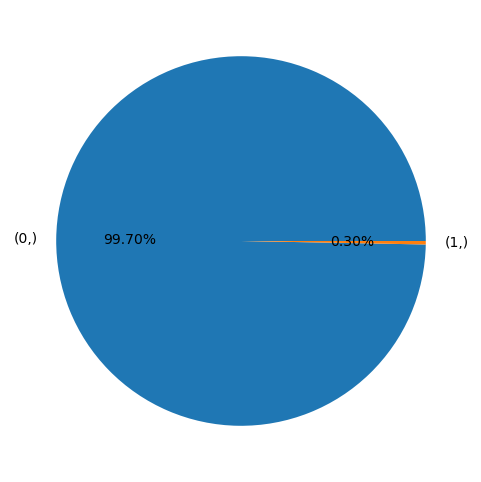

In [92]:
#persentase prediksi variabel TARGET
plt.figure(figsize=(6,6))
y_prediksi_test.value_counts().plot(kind='pie',autopct='%.2f%%')

In [93]:
y_prediksi_test.value_counts()


0    47665
1      144
dtype: int64

# **5. Rekomendasi**


- Home Credit Indonesia harus memberikan perhatian khusus kepada pelanggan yang memilih pinjaman cash loans, sedang bekerja, sudah manikah, dan memiliki rumah atau apartment karena mereka adalah pelanggan dengan proporsi tertinggi yang tidak mengalami kesulitan pembayaran. Perhatian khusus bisa berupa keringanan batas waktu pembayaran, anuitas yang lebih kecil, atau peningkatan batas pinjaman.

- Disarankan untuk membentuk model klasifikasi dengan metode balancing dataset seperti SMOTE agar hasil prediksi semakin akurat. Hal tersebut dikarenakan jumlah pelanggan yang tidak mengalami kesulitan pembayaran lebih banyak dibandingkn yang mengalami kesulitan pembayaran sehingga dataset menjadi imbalance.
